In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p7.csv
/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p15.csv
/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p8.csv
/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p10.csv
/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p4.csv
/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p1.csv
/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p6.csv
/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p5.csv
/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p3.csv
/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p14.csv
/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p2.

In [2]:
import pandas as pd
import glob

# Define the file pattern
file_pattern = "/kaggle/input/hellaswag-watermarked-eval/hellaswag_evaluation_OPT_350mb_watermarked_p*.csv"

# Get all matching files
all_files = glob.glob(file_pattern)

# Check if any files were found
if not all_files:
    print("No CSV files found with the pattern:", file_pattern)
else:
    # Read the first file
    df = pd.read_csv(all_files[0])

    # Loop through the remaining files and append them
    for filename in all_files[1:]:
        df = pd.concat([df, pd.read_csv(filename)], ignore_index=True)

    # Print a message indicating successful merge
    print("Successfully merged", len(all_files), "CSV files.")

# Optionally, specify a filename to save the merged data
merged_data_filename = "merged_hellaSwag_evaluation_watermarked.csv"
df.to_csv(merged_data_filename, index=False)
print("Merged data saved to:", merged_data_filename)

Successfully merged 15 CSV files.
Merged data saved to: merged_hellaSwag_evaluation_watermarked.csv


In [3]:
def evaluate_classification(file_path):

    # Evaluates a classification model using various metrics, reading data from a CSV file and creates a confusion matrix heatmap using seaborn.

    # Read the CSV file assuming 'label' and 'actual_label' columns are present
    df = pd.read_csv(file_path)

    # Extract true labels (assuming 'actual_label' column)
    y_true = df['answer'].tolist()

    # Extract predicted labels (assuming 'label' column)
    y_pred = df['predicted_answer'].tolist()


    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate F1-score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Calculate precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Calculate recall
    recall = recall_score(y_true, y_pred, average='weighted')
      # Define custom labels for the confusion matrix

    return accuracy, f1, precision, recall

# Specify the file path (assuming you're using Kaggle)
file_path = "/kaggle/working/merged_hellaSwag_evaluation_watermarked.csv"

# Evaluate the classification
accuracy, f1, precision, recall = evaluate_classification(file_path)

# Print classification metrics (same as before)
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy * 100:.4f}")
print(f"F1-score: {f1 * 100:.4f}")
print(f"Precision: {precision * 100:.4f}")
print(f"Recall: {recall * 100:.4f}")


Classification Metrics:
Accuracy: 18.7015
F1-score: 19.1924
Precision: 24.0555
Recall: 18.7015


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


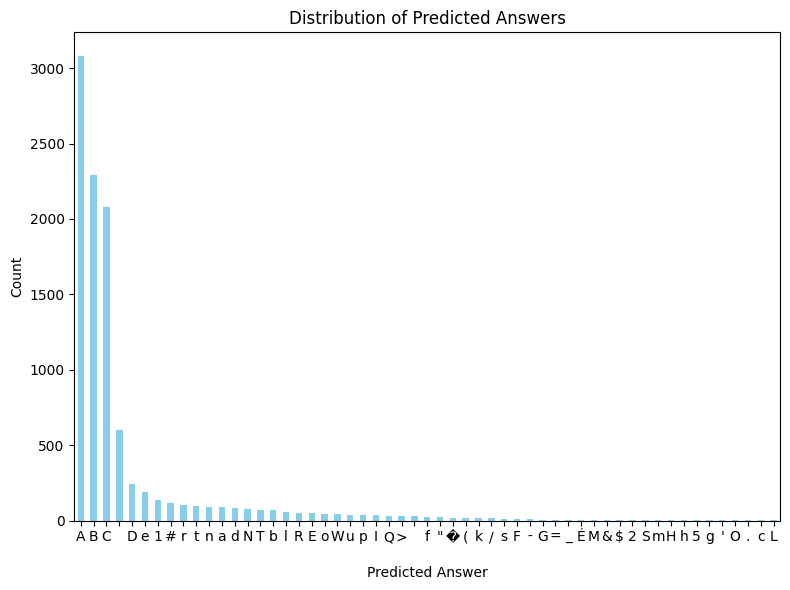

In [4]:
import matplotlib.pyplot as plt
def analyze_predictions(filename):
    """
    Analyzes predicted answers from a CSV file and creates a bar chart.

    Args:
      filename: Path to the CSV file containing "predicted_answer" column.
    """
    # Read data from CSV file
    df = pd.read_csv(filename)

    # Count occurrences of each predicted answer
    answer_counts = df['predicted_answer'].value_counts()

    # Create bar chart
    plt.figure(figsize=(8, 6))
    answer_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Predicted Answer')
    plt.ylabel('Count')
    plt.title('Distribution of Predicted Answers')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Example usage (assuming filename is set)
filename = "/kaggle/working/merged_hellaSwag_evaluation_watermarked.csv"
analyze_predictions(filename)